## Mobile Price Classification




### problem statement

###### Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In [162]:
## importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [149]:
## retrieving datasets
train_data = pd.read_csv('mobile price prediction/train.csv')

In [150]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

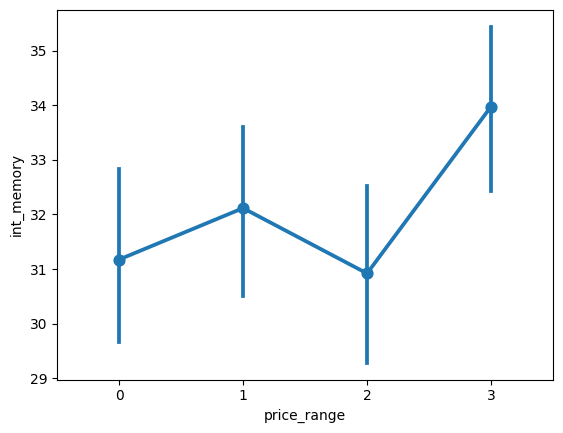

In [6]:
sns.pointplot(y = train_data['int_memory'],x = train_data['price_range'])
plt.show()

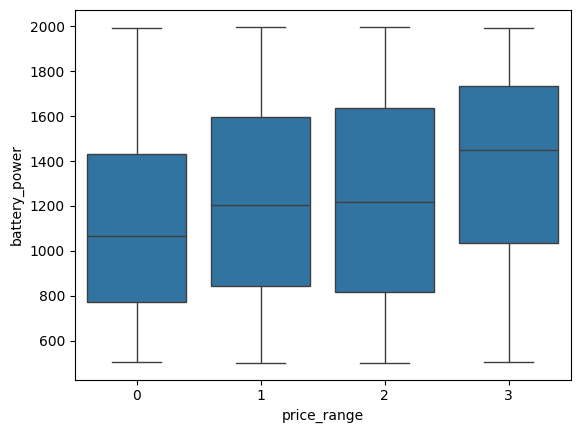

In [7]:
sns.boxplot(y = train_data['battery_power'],x = train_data['price_range'])
plt.show()

In [151]:
## checking for null values
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

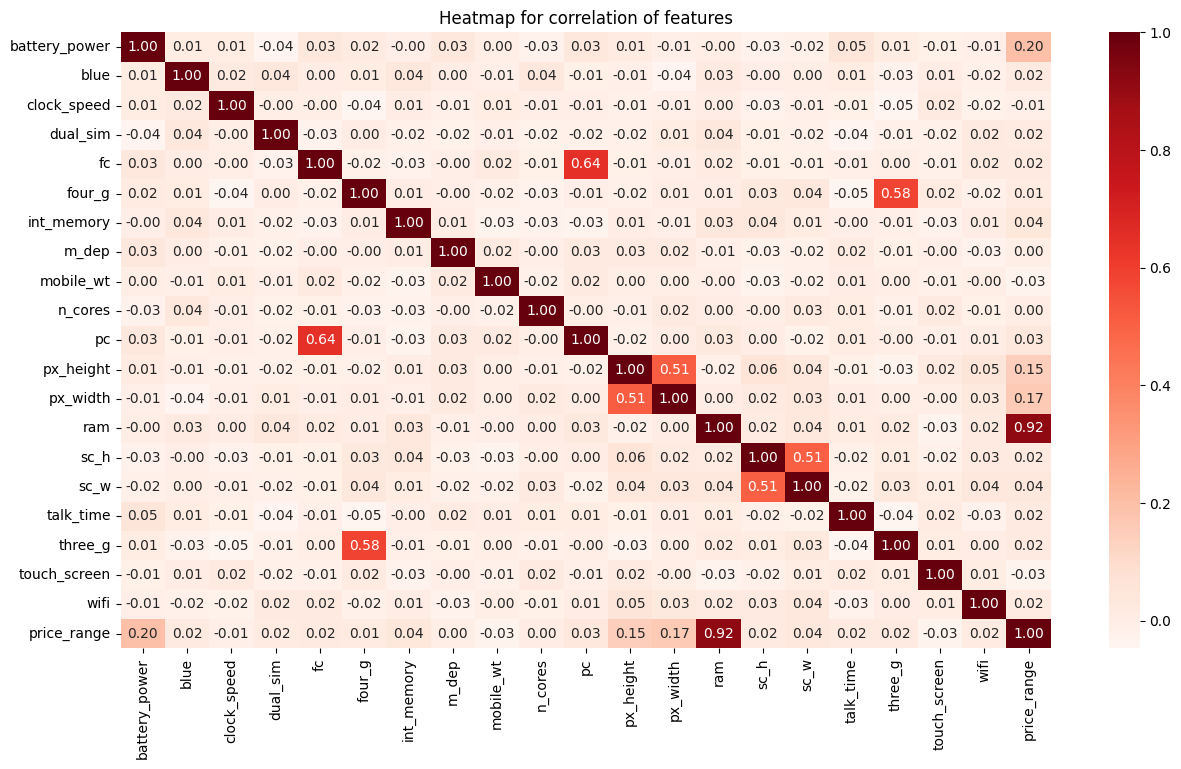

In [161]:
## plotting heatmap to find correlation between independent features and dependent feature
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),cmap = 'Reds',annot = True,fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap for correlation of features')
plt.show()

##### 1.As we can observe from the heatmap above three_g and four_g are independent features which are significantly correlated to each other, so it is better to remove one of the feature to imporve model performance. Same for the case of fc and pc features

##### 2.Battery Power,px_height,px_width and RAM are the major features contributing to the classification of price range

In [154]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

#X = X.drop(['n_cores'],axis = 1)
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [155]:
## drop unnecessary columns
X = X.drop(['n_cores','three_g','px_height','fc','sc_h'],axis = 1)

X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_width', 'ram', 'sc_w',
       'talk_time', 'touch_screen', 'wifi'],
      dtype='object')

In [156]:
## splitting train data into test and train splits

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 449)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1500, 15), (500, 15), (1500,), (500,))

In [157]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,pc,px_width,ram,sc_w,talk_time,touch_screen,wifi
1053,623,1,0.9,0,1,3,0.1,102,7,1781,3537,13,3,0,1
78,1199,1,2.5,1,1,16,0.2,116,20,1552,3448,13,10,0,1
882,1156,1,2.7,1,1,30,0.9,173,16,1913,2735,15,13,0,1
1618,502,0,0.8,0,0,52,1.0,82,8,1159,2666,4,20,1,0
1698,1619,1,0.9,0,0,20,0.9,117,9,1180,464,5,16,0,1


In [158]:
## for better performance the features need to be scaled

std_sclr = StandardScaler()

X_train_scaled = std_sclr.fit_transform(X_train)

In [32]:
X_test_scaled = std_sclr.fit_transform(X_test)

In [79]:
log_reg = LogisticRegression(random_state = 449)

log_reg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=449)

In [142]:
preds = log_reg.predict(X_test_scaled)

accuracy_score(preds,y_test)

0.892

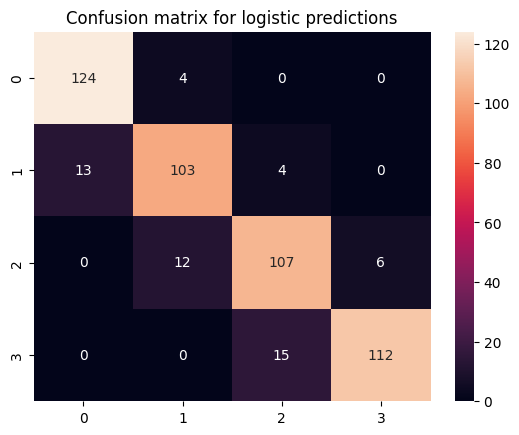

In [160]:
cm = confusion_matrix(preds,y_test)

sns.heatmap(cm,annot = True,fmt = 'd')

plt.title('Confusion matrix for logistic predictions')

plt.show()

In [106]:
dec_clf = DecisionTreeClassifier()

dec_clf.fit(X_train_scaled,y_train)

dec_preds = dec_clf.predict(X_test_scaled)

accuracy_score(dec_preds,y_test)

0.836

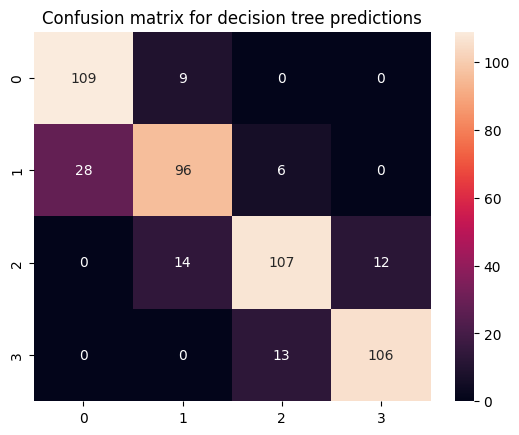

In [163]:
cm = confusion_matrix(dec_preds,y_test)

sns.heatmap(cm,annot = True,fmt = 'd')

plt.title('Confusion matrix for decision tree predictions')

plt.show()

In [143]:
bag_clf = BaggingClassifier(DecisionTreeClassifier())

param_grid = {
    'n_estimators': [10, 20, 30], 
    'max_samples': [0.5, 0.7, 1.0], 
    'max_features': [0.5, 0.7, 1.0], 
}

grid_search = GridSearchCV(bag_clf,param_grid, cv = 3,scoring = 'accuracy')

grid_search.fit(X_train,y_train)

grid_search.best_params_,grid_search.best_score_

({'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 30},
 0.8633333333333333)

In [144]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
}

grid_search = GridSearchCV(rnd_clf,param_grid,scoring = 'accuracy')

grid_search.fit(X_train,y_train)

grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [164]:
grid_search.best_score_

0.85

In [131]:
test_data = pd.read_csv('mobile price prediction/test.csv')

test_data = test_data.drop(['id','n_cores','three_g','px_height','fc','sc_h'],axis = 1)

test_data_scaled = std_sclr.fit_transform(test_data)

log_reg.predict(test_data_scaled[50].reshape(1,-1))

array([1])

### we obtained best accuracy score for LogisticRegression, Hence we will use logistic regression model for predicting the final test set

In [133]:
final_predictions = log_reg.predict(test_data_scaled)
final_predictions

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 1, 2, 1, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 1, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [147]:
print('With logistic regression an accuracy score of ',accuracy_score(preds,y_test)*100,'%','is obtained.')

With logistic regression an accuracy score of  89.2 % is obtained.
